In [145]:
#https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

data = pd.read_csv("C:/Users/user/Downloads/Depression Student Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [2]:
data.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [3]:
data2=data.copy()

In [4]:
numerical_cols = ['Age', 'Study Hours']
ordinal_cols = ['Academic Pressure', 'Study Satisfaction', 'Financial Stress']
categorical_cols = ['Gender','Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness','Have you ever had suicidal thoughts ?']
categorical_cols2=['Depression']

le = LabelEncoder()
data2['Depression'] = le.fit_transform(data2['Depression'])

ordinal_encoder = OrdinalEncoder()
data2[ordinal_cols] = ordinal_encoder.fit_transform(data2[ordinal_cols])


In [5]:
data2

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,1.0,3.0,7-8 hours,Moderate,Yes,9,1.0,Yes,0
1,Male,28,3.0,4.0,5-6 hours,Healthy,Yes,7,0.0,Yes,0
2,Male,25,0.0,2.0,5-6 hours,Unhealthy,Yes,10,3.0,No,1
3,Male,23,0.0,3.0,More than 8 hours,Unhealthy,Yes,7,1.0,Yes,0
4,Female,31,0.0,4.0,More than 8 hours,Healthy,Yes,4,1.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,4.0,1.0,More than 8 hours,Unhealthy,No,8,2.0,No,1
498,Male,24,1.0,0.0,Less than 5 hours,Unhealthy,Yes,8,4.0,No,1
499,Female,23,2.0,4.0,5-6 hours,Healthy,No,1,4.0,Yes,0
500,Male,33,3.0,3.0,More than 8 hours,Healthy,No,8,0.0,Yes,0


In [6]:
cols_of_interest = numerical_cols + ordinal_cols+categorical_cols2
data2[cols_of_interest].corr()

,Age,Study Hours,Academic Pressure,Study Satisfaction,Financial Stress,Depression
Age,1.000000,0.050112,0.027132,-0.005093,-0.095348,-0.215625
Study Hours,0.050112,1.000000,0.053024,-0.014122,0.015554,0.200441
Academic Pressure,0.027132,0.053024,1.000000,-0.101571,0.003168,0.476259
Study Satisfaction,-0.005093,-0.014122,-0.101571,1.000000,-0.038012,-0.293484
Financial Stress,-0.095348,0.015554,0.003168,-0.038012,1.000000,0.296846
Depression,-0.215625,0.200441,0.476259,-0.293484,0.296846,1.000000


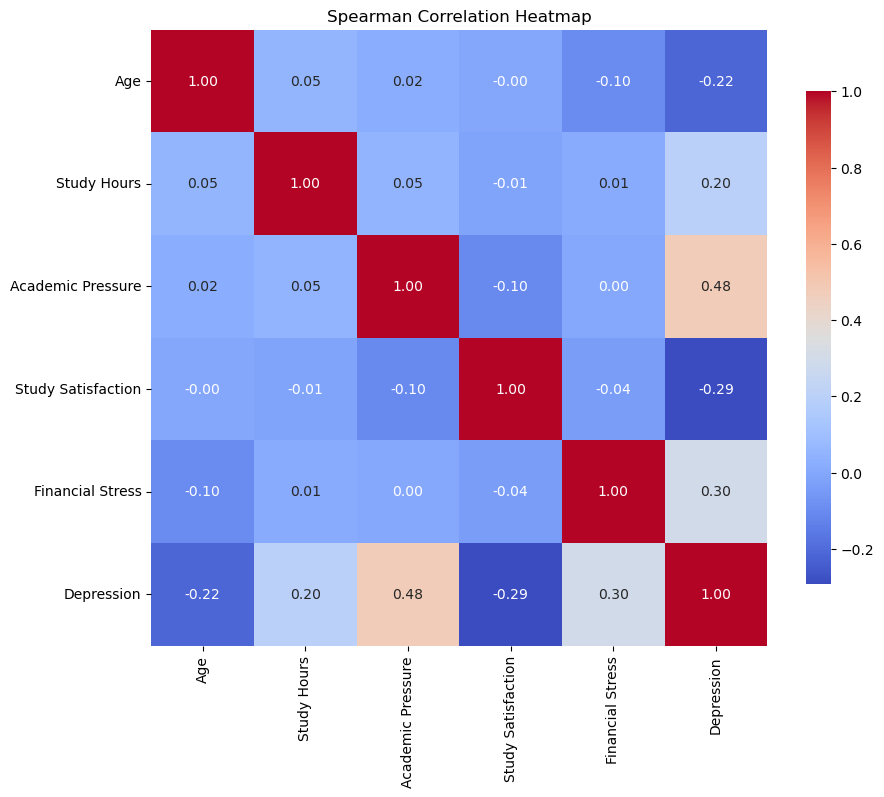

In [7]:
correlation_matrix = data2[cols_of_interest].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': .8})
plt.title('Spearman Correlation Heatmap')
plt.show()

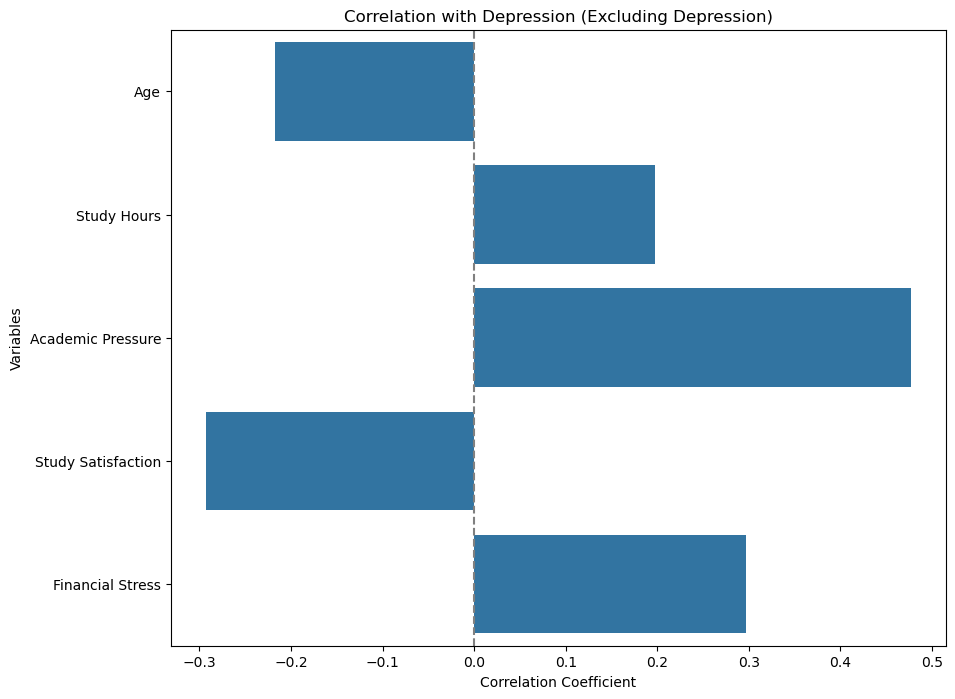

In [8]:
depression_corr = correlation_matrix['Depression'].drop('Depression')
plt.figure(figsize=(10, 8))
sns.barplot(y=depression_corr.index, x=depression_corr.values)
plt.title('Correlation with Depression (Excluding Depression)')
plt.ylabel('Variables')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='grey', linestyle='--') 
plt.show()

In [9]:
depression_corr = correlation_matrix['Depression'].round(2)
significant_vars = depression_corr[depression_corr.abs() >= 0.3]

print(significant_vars)

Academic Pressure    0.48
Financial Stress     0.30
Depression           1.00
Name: Depression, dtype: float64


In [11]:
def chi_square_test(var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

variables = [
    ('Depression', 'Gender'),
    ('Depression', 'Dietary Habits'),
    ('Depression', 'Family History of Mental Illness'),
    ('Depression', 'Have you ever had suicidal thoughts ?'),
    ('Depression', 'Sleep Duration')
]

for var1, var2 in variables:
    chi2, p = chi_square_test(var1, var2)
    print(f'Chi-Squared Test between {var1} and {var2}: Chi2 = {chi2}, p-value = {p}')

Chi-Squared Test between Depression and Gender: Chi2 = 0.38492984630407523, p-value = 0.5349766034660102
Chi-Squared Test between Depression and Dietary Habits: Chi2 = 18.06921526180028, p-value = 0.00011921194115207693
Chi-Squared Test between Depression and Family History of Mental Illness: Chi2 = 1.362453944244154, p-value = 0.2431126440218774
Chi-Squared Test between Depression and Have you ever had suicidal thoughts ?: Chi2 = 107.29249523153612, p-value = 3.840860716984221e-25
Chi-Squared Test between Depression and Sleep Duration: Chi2 = 2.211071033359143, p-value = 0.5297710162329188


In [12]:
for var1, var2 in variables:
    chi2, p = chi_square_test(var1, var2)
    if p < 0.05:
        print(f'Chi-Squared Test between {var1} and {var2}: Chi2 = {chi2}, p-value = {p}')

Chi-Squared Test between Depression and Dietary Habits: Chi2 = 18.06921526180028, p-value = 0.00011921194115207693
Chi-Squared Test between Depression and Have you ever had suicidal thoughts ?: Chi2 = 107.29249523153612, p-value = 3.840860716984221e-25


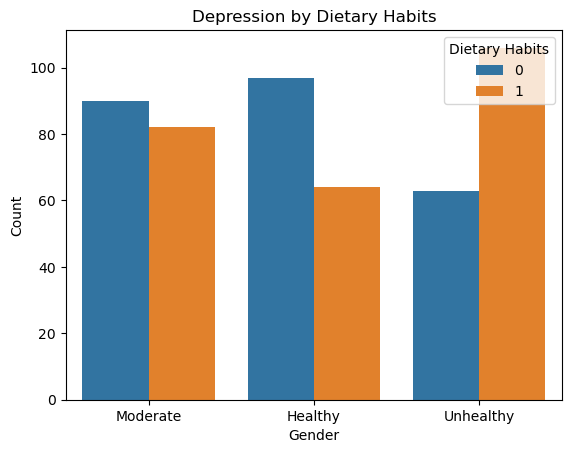

In [13]:
sns.countplot(data=data2, x='Dietary Habits', hue='Depression')
plt.title('Depression by Dietary Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Dietary Habits')
plt.show()

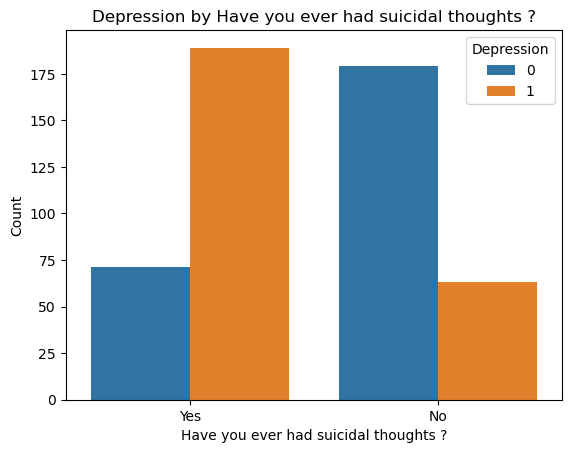

In [14]:
sns.countplot(data=data2, x='Have you ever had suicidal thoughts ?', hue='Depression')
plt.title('Depression by Have you ever had suicidal thoughts ?')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

In [15]:
data3=data.copy()

In [16]:
categorical_cols = ['Dietary Habits', 'Have you ever had suicidal thoughts ?','Depression']
ordinal_cols = ['Academic Pressure', 'Financial Stress']  # Ordinal variables

le = LabelEncoder()
for col in categorical_cols:
    data3[col] = le.fit_transform(data3[col])

# Encode ordinal columns using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data3[ordinal_cols] = ordinal_encoder.fit_transform(data3[ordinal_cols])


In [17]:
data3[['Dietary Habits', 'Have you ever had suicidal thoughts ?','Depression','Academic Pressure', 'Financial Stress']]

,Dietary Habits,Have you ever had suicidal thoughts ?,Depression,Academic Pressure,Financial Stress
0,1,1,0,1.0,1.0
1,0,1,0,3.0,0.0
2,2,1,1,0.0,3.0
3,2,1,0,0.0,1.0
4,0,1,0,0.0,1.0
...,...,...,...,...,...
497,2,0,1,4.0,2.0
498,2,1,1,1.0,4.0
499,0,0,0,2.0,4.0
500,0,0,0,3.0,0.0


In [21]:
import statsmodels.api as sm
X = data3[['Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress']]
y = data3['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

X_with_constant = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_with_constant)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.351959
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                  401
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            4
Date:                Sat, 14 Dec 2024   Pseudo R-squ.:                  0.4922
Time:                        15:16:14   Log-Likelihood:                -141.14
converged:                       True   LL-Null:                       -277.94
Covariance Type:            nonrobust   LLR p-value:                 5.316e-58
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.4087      

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9010
Confusion Matrix:
[[42  6]
 [ 4 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.89      0.92      0.91        53

    accuracy                           0.90       101
   macro avg       0.90      0.90      0.90       101
weighted avg       0.90      0.90      0.90       101



In [23]:
y_train_pred = logistic_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Training Accuracy: 0.8354
Test Accuracy: 0.9010


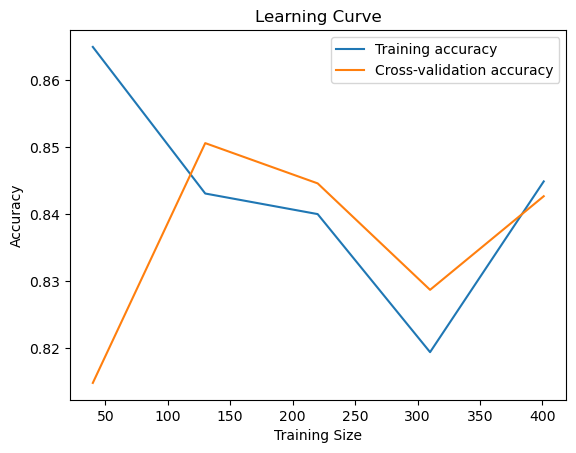

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [25]:
new_data = pd.DataFrame({
    'Dietary Habits': [1],  # 0: Healthy, 1: Moderate, 2: Unhealthy
    'Have you ever had suicidal thoughts ?': [1],  # 0:NO, 1:YES
    'Academic Pressure': [2],  # 1~5(LOW~HIGH)
    'Financial Stress': [3]  # 1~5(LOW~HIGH)
})


predicted_probabilities = logistic_model.predict_proba(new_data)[:, 1]  # 우울증 확률
predicted_classes = logistic_model.predict(new_data)  # 우울증 여부 (0 또는 1)

print(f'우울증걸릴 확률: {predicted_probabilities[0]}')
print(f'예측클래스 (우울증): {predicted_classes[0]}')


우울증걸릴 확률: 0.8861427074881761
예측클래스 (우울증): 1


In [26]:
new_data = pd.DataFrame({
    'Dietary Habits': [0],  # 0: Healthy, 1: Moderate, 2: Unhealthy
    'Have you ever had suicidal thoughts ?': [0],  # 0:NO, 1:YES
    'Academic Pressure': [1],  # 1~5(LOW~HIGH)
    'Financial Stress': [1]  # 1~5(LOW~HIGH)
})

predicted_probabilities = logistic_model.predict_proba(new_data)[:, 1]  # 우울증 확률
predicted_classes = logistic_model.predict(new_data)  # 우울증 여부 (0 또는 1)

print(f'우울증걸릴 확률: {predicted_probabilities[0]}')
print(f'예측클래스 (우울증): {predicted_classes[0]}')

우울증걸릴 확률: 0.018631220708079717
예측클래스 (우울증): 0
